In [325]:
#Importação dos pacotes necessários
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [326]:
#Arquivos de treino e teste
treino=pd.read_csv('train.csv')
teste=pd.read_csv('test.csv')
teste.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,41,PR,22,F,3,1,1,5,1,...,40.0,420.0,B,A,C,A,A,C,C,A
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,21,MA,26,F,3,1,1,8,1,...,100.0,580.0,E,B,C,B,B,B,F,A
2,b38a03232f43b11c9d0788abaf060f7366053b6d,23,CE,21,M,1,1,2,0,2,...,80.0,320.0,E,E,D,B,B,A,NaN,A
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,15,PA,27,F,3,1,1,8,1,...,NaN,NaN,H,E,G,B,B,A,NaN,A
4,715494628a50142ce8cb17191cfe6d0f3cae0934,41,PR,18,M,1,1,2,0,2,...,0.0,320.0,D,H,H,C,B,A,NaN,A


In [346]:
treino.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,...,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,...,NaN,A,A,C,A,B,A,A,C,A
2,3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,...,NaN,A,A,A,A,C,A,A,B,A
3,4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,...,5.0,C,A,A,A,A,D,A,A,A
4,5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,...,NaN,A,A,A,A,A,A,A,A,A


In [327]:
#Analisando a relação ente os dados
print(set(teste.columns).issubset(set(treino.columns)))

True


In [328]:
#criando df de treino
df_treino=pd.DataFrame({'UF':treino.SG_UF_RESIDENCIA,'Idade':treino.NU_IDADE,'Sexo':treino.TP_SEXO,
                       'Raça':treino.TP_COR_RACA,'Sit_de_conc':treino.TP_ST_CONCLUSAO,
                       'Ano':treino.TP_ANO_CONCLUIU,'Tipo_escola':treino.TP_ESCOLA,
                       'Tipo_ensino':treino.TP_ENSINO,'Dependencia_Escola':treino.TP_DEPENDENCIA_ADM_ESC,
                       'NOTA_CN':treino.NU_NOTA_CN,'NOTA_CH':treino.NU_NOTA_CH,
                       'NOTA_LC':treino.NU_NOTA_LC,'NOTA_MT':treino.NU_NOTA_MT,'Q001':treino.Q001,
                        'Q002':treino.Q002,'Q006':treino.Q006,'Q024':treino.Q024,'Q025':treino.Q025,
                        'Q026':treino.Q026,'Q027':treino.Q027,'Q047':treino.Q047})
df_treino.head(20)

,UF,Idade,Sexo,Raça,Sit_de_conc,Ano,Tipo_escola,Tipo_ensino,Dependencia_Escola,NOTA_CN,...,NOTA_LC,NOTA_MT,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,RS,24,M,1,1,4,1,NaN,NaN,436.3,...,581.2,399.4,D,D,C,A,A,C,H,A
1,CE,17,F,3,2,0,2,1.0,2.0,474.5,...,599.0,459.8,A,A,B,A,A,A,NaN,A
2,CE,21,F,3,3,0,1,NaN,NaN,NaN,...,NaN,NaN,D,D,C,A,A,A,NaN,A
3,RJ,25,F,0,1,9,1,NaN,NaN,NaN,...,NaN,NaN,H,E,E,C,B,C,F,D
4,AM,28,M,2,1,4,1,NaN,NaN,NaN,...,NaN,NaN,E,D,C,A,A,B,F,A
5,BA,18,F,1,1,1,1,NaN,NaN,439.7,...,410.9,364.5,E,E,C,B,B,A,NaN,A
6,MT,18,F,3,2,0,2,1.0,2.0,420.1,...,484.5,529.2,E,D,C,B,B,C,E,A
7,RS,18,F,1,1,1,1,NaN,NaN,619.6,...,611.2,566.7,G,F,L,B,B,A,NaN,D
8,PE,16,F,3,2,0,2,1.0,2.0,500.5,...,521.8,372.4,H,E,B,A,B,A,NaN,A
9,MG,24,M,4,4,0,1,NaN,NaN,NaN,...,NaN,NaN,H,E,G,B,B,B,H,A


In [329]:
#analisando a correlação
correl=df_treino.corr()['NOTA_MT'].drop(['Tipo_ensino','Dependencia_Escola'])
print(correl)

Idade         -0.061485
Raça          -0.157364
Sit_de_conc   -0.087869
Ano            0.029039
Tipo_escola    0.069304
NOTA_CN        0.584941
NOTA_CH        0.529594
NOTA_LC        0.494695
NOTA_MT        1.000000
Name: NOTA_MT, dtype: float64


In [330]:
correl_final=correl[abs(correl)>0.02].drop(['NOTA_MT']) 
correl_final.shape

(8,)

In [331]:
correlacao = list(correl_final.index)
correlacao.append('NU_NOTA_MT')
print(correlacao)

['Idade', 'Raça', 'Sit_de_conc', 'Ano', 'Tipo_escola', 'NOTA_CN', 'NOTA_CH', 'NOTA_LC', 'NU_NOTA_MT']


In [332]:
#usando sklearn
from sklearn.linear_model import LinearRegression

In [333]:
df_model=df_treino[['Idade', 'Raça', 'Sit_de_conc', 'Ano', 
                    'Tipo_escola', 'NOTA_CN', 'NOTA_CH', 'NOTA_LC', 'NOTA_MT']]
df_model

,Idade,Raça,Sit_de_conc,Ano,Tipo_escola,NOTA_CN,NOTA_CH,NOTA_LC,NOTA_MT
0,24,1,1,4,1,436.3,495.4,581.2,399.4
1,17,3,2,0,2,474.5,544.1,599.0,459.8
2,21,3,3,0,1,NaN,NaN,NaN,NaN
3,25,0,1,9,1,NaN,NaN,NaN,NaN
4,28,2,1,4,1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
13725,20,1,1,3,1,438.2,419.7,394.5,403.2
13726,33,3,1,10,1,423.8,557.9,533.0,452.4
13727,15,1,3,0,1,460.5,528.9,569.3,398.0
13728,36,3,4,0,1,422.5,621.7,569.0,386.6


In [334]:
df_model2=df_model.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
df_model2

,Idade,Raça,Sit_de_conc,Ano,Tipo_escola,NOTA_CN,NOTA_CH,NOTA_LC,NOTA_MT
0,24,1,1,4,1,436.3,495.4,581.2,399.4
1,17,3,2,0,2,474.5,544.1,599.0,459.8
5,18,1,1,1,1,439.7,583.2,410.9,364.5
6,18,3,2,0,2,420.1,604.2,484.5,529.2
7,18,1,1,1,1,619.6,625.8,611.2,566.7
...,...,...,...,...,...,...,...,...,...
13725,20,1,1,3,1,438.2,419.7,394.5,403.2
13726,33,3,1,10,1,423.8,557.9,533.0,452.4
13727,15,1,3,0,1,460.5,528.9,569.3,398.0
13728,36,3,4,0,1,422.5,621.7,569.0,386.6


In [335]:
y=df_model2.NOTA_MT
x=df_model2.drop('NOTA_MT',axis=1)

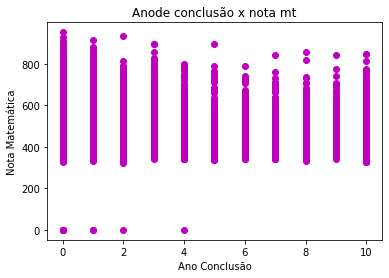

In [336]:
#analisando correlação
plt.scatter(df_model2.Ano,y, color='m')
plt.xlabel('Ano Conclusão')
plt.ylabel('Nota Matemática')
plt.title('Anode conclusão x nota mt')
plt.show()

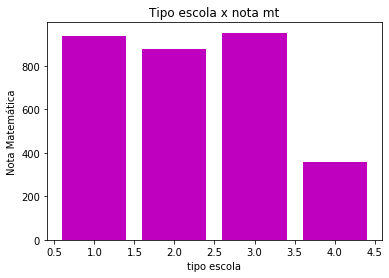

In [337]:
#analisando correlação
plt.bar(df_model2.Tipo_escola,y, color='m')
plt.xlabel('tipo escola')
plt.ylabel('Nota Matemática')
plt.title('Tipo escola x nota mt')
plt.show()

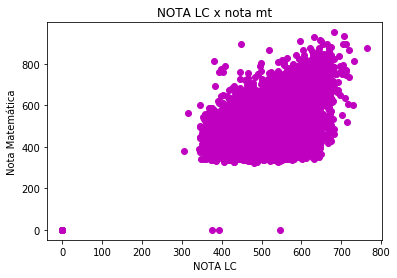

In [341]:
#analisando correlação
plt.scatter(df_model2.NOTA_LC,y, color='m')
plt.xlabel('NOTA LC')
plt.ylabel('Nota Matemática')
plt.title('NOTA LC x nota mt')
plt.show()

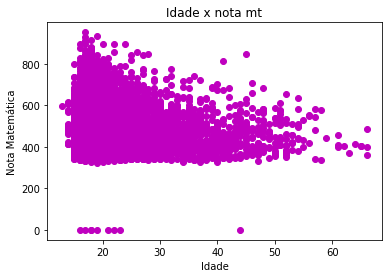

In [342]:
#analisando correlação
plt.scatter(df_model2.Idade,y, color='m')
plt.xlabel('Idade')
plt.ylabel('Nota Matemática')
plt.title('Idade x nota mt')
plt.show()

In [ ]:
#treinando com método fit
regressao=LinearRegression()
type(regressao)

In [ ]:
regressao.fit(x,y)

In [ ]:
print(regressao.intercept_)

In [ ]:
regressao.predict(x)

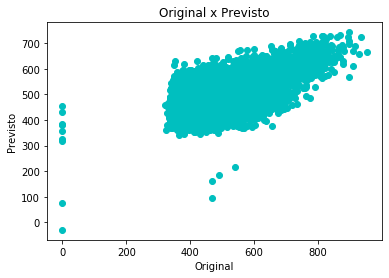

In [343]:
plt.scatter(df_model2.NOTA_MT,regressao.predict(x),color ='c')
plt.xlabel('Original')
plt.ylabel('Previsto')
plt.title('Original x Previsto')
plt.show()

In [ ]:
#Calculando a média de erro
media_erro=np.mean((df_model2.NOTA_MT-regressao.predict(x))**2)
media_erro

In [ ]:
#dividindo o modelo em treino e teste
#Função train_test_split promove a divisão randomica dos dados
from sklearn.model_selection import train_test_split

In [ ]:
#dividindo os dados
#test size = 0.30 = 70% de treino, 30% teste
x_treino,x_teste, y_treino, y_teste= train_test_split(x,df_model2.NOTA_MT, test_size=0.30, 
                                                      random_state =5)
print(x_treino.shape,x_teste.shape, y_treino.shape, y_teste.shape)

In [ ]:
regr=LinearRegression()

In [ ]:
regr.fit(x_treino,y_treino)

In [ ]:
#definindo treino e teste
pred_treino= regr.predict(x_treino)
pred_teste= regr.predict(x_teste)

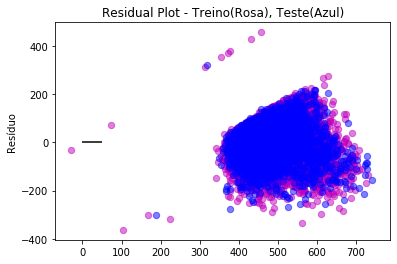

In [344]:
plt.scatter(regr.predict(x_treino), regr.predict(x_treino) - y_treino, c = 'm', s = 40, alpha = 0.5)
plt.scatter(regr.predict(x_teste), regr.predict(x_teste) - y_teste, c = 'b', s = 40, alpha = 0.5)
plt.hlines(y = 0, xmin = 0, xmax = 50)
plt.ylabel("Resíduo")
plt.title("Residual Plot - Treino(Rosa), Teste(Azul)")
plt.show()

In [ ]:
teste_2=teste.set_index('NU_INSCRICAO')
teste_2

In [ ]:
teste_3=pd.DataFrame({'Idade':teste_2.NU_IDADE,'Raça':teste_2.TP_COR_RACA,
                      'Sit_de_conc':teste_2.TP_ST_CONCLUSAO,
                       'Ano':teste_2.TP_ANO_CONCLUIU,'Tipo_escola':teste_2.TP_ESCOLA,
                       'NOTA_CN':teste_2.NU_NOTA_CN,'NOTA_CH':teste_2.NU_NOTA_CH,
                       'NOTA_LC':teste_2.NU_NOTA_LC})
teste_3.head(20)

In [ ]:
teste_4=teste_3.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
teste_4

In [ ]:
pred_teste= regr.predict(teste_4)

In [ ]:
pred_teste.shape

In [ ]:
teste_4['NU_NOTA_MT']=pred_teste

In [ ]:
teste_4.head(10)

In [ ]:
resp=teste_4[{'NU_NOTA_MT':teste_4.NU_NOTA_MT}]
resp.head()

In [ ]:
with open('answer.csv','w',newline='\n') as f:
    f.write(resp.to_csv(line_terminator=None))

In [345]:
reposta = pd.read_csv('answer.csv')
reposta.head(10)

,NU_INSCRICAO,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,434.172650
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,433.388673
2,b38a03232f43b11c9d0788abaf060f7366053b6d,595.747900
3,715494628a50142ce8cb17191cfe6d0f3cae0934,554.736859
4,e656d6bad65c93fb2880f1eba5037008c8e75774,463.283365
5,465cd2a6907fb37d9d8ad3c065f0e2dabdba9b13,552.182438
6,11539e86171bf07d3a36f09377d7f54ebcc8406a,439.726122
7,043c544a2104aa8a9849f1a703a08d37a2f16839,469.999979
8,76ba050e64ad100b856f0eaabd8f539d5c7dd185,464.741175
9,940aede382ccb332fab15d413217695ec44ca765,450.962762
